## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2160, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2160
TAG      2160
POSTS    2160
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,38315
c,362460
c#,1490487
c++,732761
delphi,48343
go,55102
java,1789885
javascript,2249592
perl,65764


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,156,156
c,156,156
c#,157,157
c++,156,156
delphi,156,156
go,141,141
java,156,156
javascript,156,156
perl,156,156


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
# seleccionar una celda individual
# 1ra forma
df['DATE'][1]

'2008-08-01 00:00:00'

In [10]:
# 2da forma
df.DATE[1]

'2008-08-01 00:00:00'

In [11]:
# convertir la celda a formato de tiempo
date = pd.to_datetime(df['DATE'][1])
print(date)
print(type(date))

2008-08-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
# convertir toda la columna
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [13]:
reshaped_df = df.pivot(index='DATE',columns='TAG',values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [14]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,509.0,164.0,14.0,NaN,222.0,163.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1650.0,754.0,105.0,NaN,1136.0,639.0,131.0,481.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1153.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


In [15]:
# show how many rows and columns have the new dataset
reshaped_df.shape

(157, 14)

In [16]:
# examine the head and the tail
reshaped_df.head()
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2021-03-01,340.0,2666.0,7338.0,4750.0,271.0,828.0,10476.0,19889.0,154.0,5615.0,28289.0,6089.0,570.0,2914.0
2021-04-01,344.0,2469.0,6788.0,4363.0,187.0,688.0,9545.0,18754.0,143.0,5156.0,26688.0,5628.0,607.0,2540.0
2021-05-01,326.0,2274.0,6591.0,4617.0,179.0,702.0,9750.0,18555.0,123.0,5132.0,26251.0,5417.0,449.0,2216.0
2021-06-01,285.0,2025.0,6495.0,4221.0,133.0,653.0,9320.0,17832.0,160.0,4952.0,24768.0,4979.0,472.0,2134.0
2021-07-01,234.0,1922.0,6939.0,4411.0,160.0,783.0,9519.0,19265.0,149.0,5829.0,26945.0,4974.0,531.0,2486.0


In [17]:
# print the columns name
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [18]:
# count the number of entries per column
reshaped_df.count()

TAG
assembly      156
c             156
c#            157
c++           156
delphi        156
go            141
java          156
javascript    156
perl          156
php           156
python        156
r             154
ruby          156
swift         148
dtype: int64

In [19]:
# Lidiando con valores "NaN"
# en este caso no queremos eliminar los valores NaN. Solo queremos sustituirlo con 0.
reshaped_df.fillna(0, inplace=True)

In [20]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,509.0,164.0,14.0,0.0,222.0,163.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1650.0,754.0,105.0,0.0,1136.0,639.0,131.0,481.0,540.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1989.0,810.0,112.0,0.0,1153.0,726.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,503.0,452.0,1.0,159.0,0.0


In [21]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

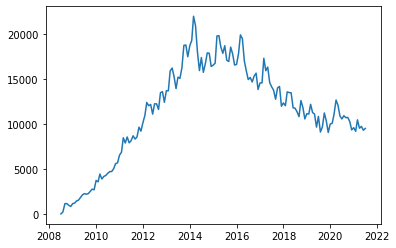

In [30]:
plt.plot(reshaped_df.index, reshaped_df['java'])

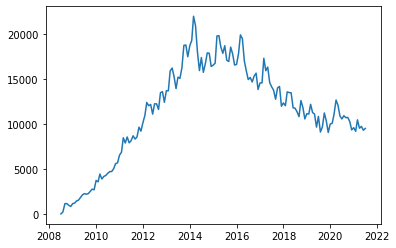

In [31]:
plt.plot(reshaped_df['java'])

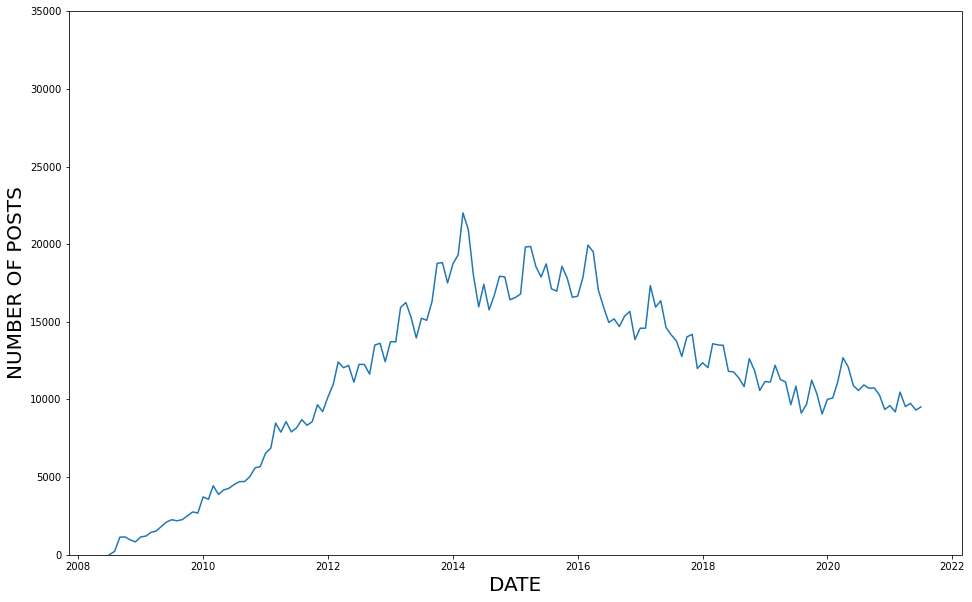

In [39]:
# using methods to styling the chart
plt.figure(figsize=(16,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('DATE', fontsize=20)
plt.ylabel('NUMBER OF POSTS', fontsize=20)
plt.ylim(0, 35000)
plt.plot(reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

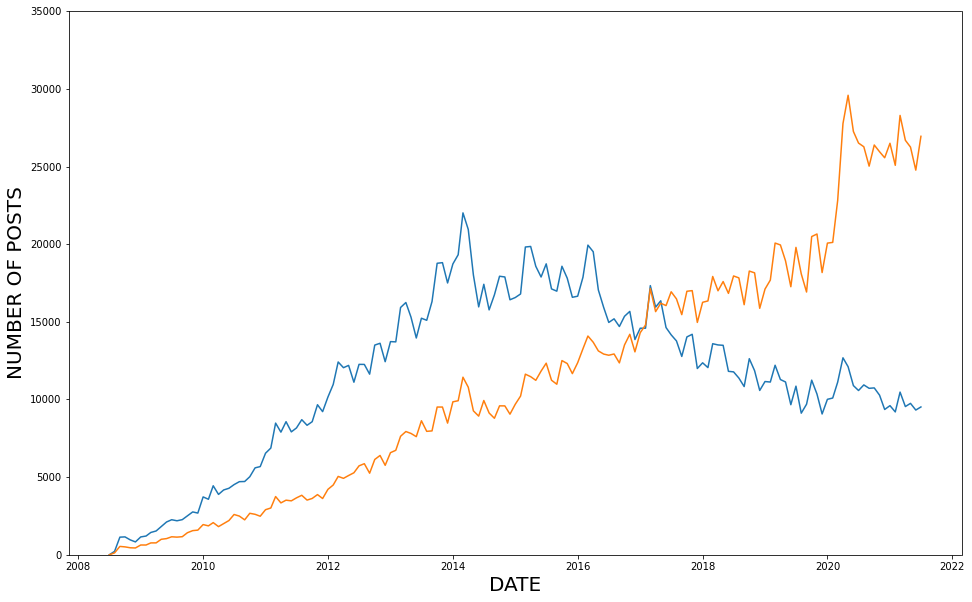

In [40]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('DATE', fontsize=20)
plt.ylabel('NUMBER OF POSTS', fontsize=20)
plt.ylim(0, 35000)
plt.plot(reshaped_df[['java', 'python']])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

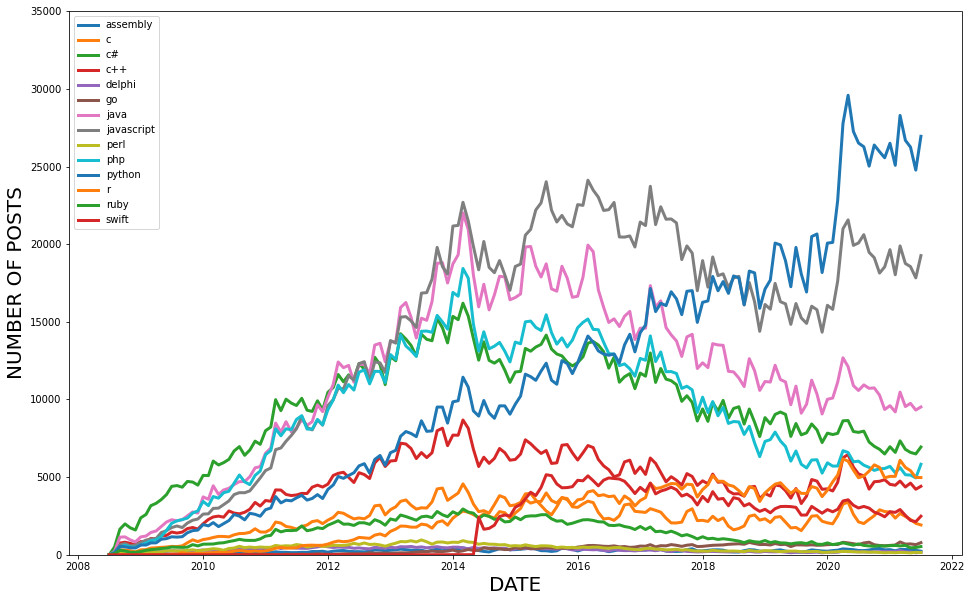

In [45]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('DATE', fontsize=20)
plt.ylabel('NUMBER OF POSTS', fontsize=20)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=10)

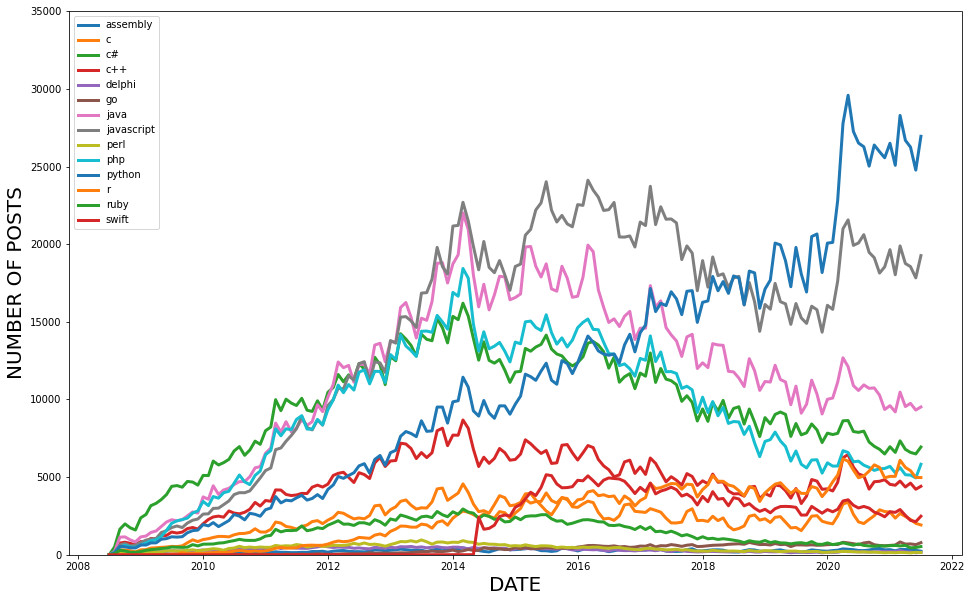

In [48]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('DATE', fontsize=20)
plt.ylabel('NUMBER OF POSTS', fontsize=20)
plt.ylim(0, 35000)
plt.plot(reshaped_df, linewidth=3, label=reshaped_df.columns)
plt.legend(fontsize=10)